In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Baseball.csv')

In [3]:
data.rename(columns={'W':'Wins', 'R':'Runs', 'AB':'AtBats', 'H':'Hits', '2B':'Doubles', '3B':'Triples', 'HR':'Homeruns', 'BB':'Walks', 'SO':'Strikeouts', 'SB':'StolenBases', 'RA':'RunsAllowed', 'ER':'EarnedRuns', 'ERA':'EarnedRunAverage', 'CG':'CG', 'SHO':'Shutouts', 'SV':'Saves','E':'Errors'}, inplace=True)

In [4]:
print(data.isnull().sum())

Wins                0
Runs                0
AtBats              0
Hits                0
Doubles             0
Triples             0
Homeruns            0
Walks               0
Strikeouts          0
StolenBases         0
RunsAllowed         0
EarnedRuns          0
EarnedRunAverage    0
CG                  0
Shutouts            0
Saves               0
Errors              0
dtype: int64


In [5]:
data

,Wins,Runs,AtBats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,StolenBases,RunsAllowed,EarnedRuns,EarnedRunAverage,CG,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [6]:
data.corr()
# There is a high correlation between winning a match and number of saves

,Wins,Runs,AtBats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,StolenBases,RunsAllowed,EarnedRuns,EarnedRunAverage,CG,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AtBats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
StolenBases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


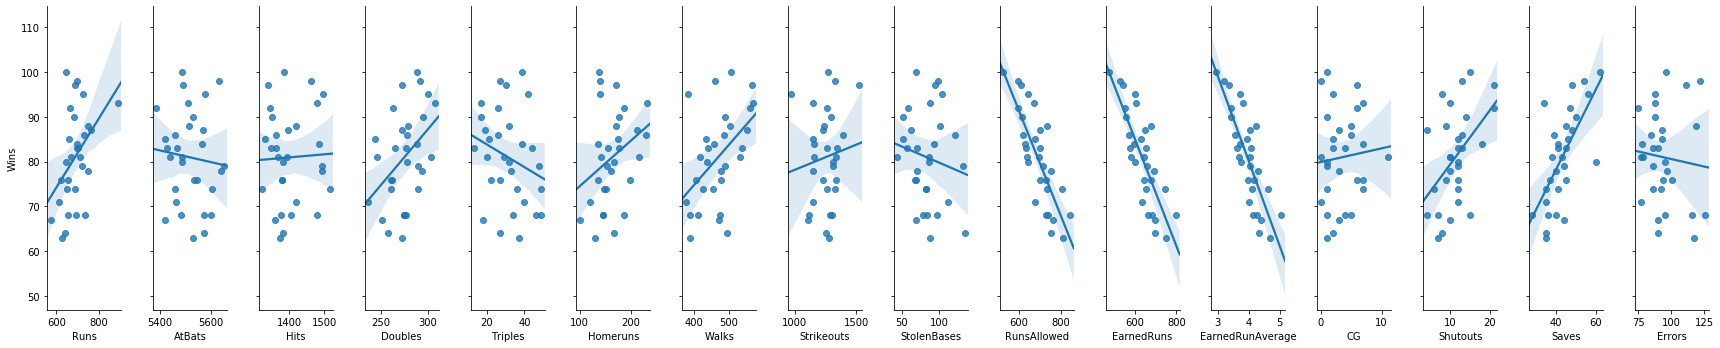

In [7]:
sns.pairplot(data, x_vars=['Runs','AtBats','Hits','Doubles','Triples', 'Homeruns', 'Walks', 'Strikeouts', 'StolenBases', 'RunsAllowed', 'EarnedRuns', 'EarnedRunAverage', 'CG', 'Shutouts', 'Saves', 'Errors'], y_vars='Wins', size=5, aspect=0.3, kind='reg')
plt.show()

In [8]:
data.drop(columns=['AtBats','Hits','Triples', 'Strikeouts','StolenBases', 'CG','Errors'], inplace=True)
data

,Wins,Runs,Doubles,Homeruns,Walks,RunsAllowed,EarnedRuns,EarnedRunAverage,Shutouts,Saves
0,95,724,300,139,383,641,601,3.73,8,56
1,83,696,277,156,439,700,653,4.07,12,45
2,81,669,303,141,533,640,584,3.67,10,38
3,76,622,260,136,404,701,643,3.98,9,37
4,74,689,289,151,455,803,746,4.64,12,35
5,93,891,308,232,570,670,609,3.80,10,34
6,87,764,272,212,554,698,652,4.03,4,48
7,81,713,246,217,418,693,646,4.05,10,43
8,80,644,278,167,436,642,604,3.74,12,60
9,78,748,294,161,478,753,694,4.31,10,40


In [9]:
data.skew()

Wins                0.047089
Runs                1.200786
Doubles            -0.230650
Homeruns            0.516441
Walks               0.158498
RunsAllowed         0.045734
EarnedRuns          0.058710
EarnedRunAverage    0.053331
Shutouts            0.565790
Saves               0.657524
dtype: float64

In [10]:
data.shape

(30, 10)

In [11]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Wins                13.7500
Runs                67.0000
Doubles             26.5000
Homeruns            36.7500
Walks               73.0000
RunsAllowed         96.2500
EarnedRuns          92.0000
EarnedRunAverage     0.5375
Shutouts             4.0000
Saves                9.5000
dtype: float64


In [12]:
data=data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]
data.shape

(25, 10)

In [13]:
data.skew()

Wins                0.040763
Runs               -0.243593
Doubles            -0.327711
Homeruns            0.603578
Walks               0.066635
RunsAllowed         0.083717
EarnedRuns         -0.075854
EarnedRunAverage   -0.177638
Shutouts           -0.021383
Saves               0.544052
dtype: float64

In [14]:
x=data.drop(columns=['Wins'])
y=data['Wins']

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8
0,0.941277,1.479903,-0.694276,-1.617757,-0.958993,-0.783120,-0.783295,-0.902584,1.887511
1,0.333441,0.196428,-0.127928,-0.428230,0.066018,0.172801,0.187260,0.424745,0.338062
2,-0.252686,1.647313,-0.627646,1.568476,-0.976366,-1.095633,-0.954569,-0.238919,-0.647952
3,-1.272982,-0.752228,-0.794219,-1.171684,0.083391,-0.011030,-0.069652,-0.570752,-0.788811
4,0.181482,0.866067,-0.294501,-0.088365,1.855442,1.882429,1.814367,0.424745,-1.070529
5,1.809614,-0.082589,1.737688,2.014549,0.031271,0.154418,0.073077,-2.229914,0.760639
6,0.702485,-1.533475,1.904260,-0.874302,-0.055594,0.044119,0.130169,-0.238919,0.056344
7,-0.795397,0.252231,0.238532,-0.491954,-0.941620,-0.727971,-0.754749,0.424745,2.450947
8,1.462279,1.145084,0.038645,0.400191,0.986789,0.926508,0.872358,-0.238919,-0.366234
9,1.527405,0.308034,0.405105,0.931230,0.639328,0.669145,0.672537,-0.570752,0.338062


In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2score(cm,x,y):
    maxr2=0
    rs=0
    for r_state in range(0,150):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.2)
        cm.fit(x_train,y_train)
        y_pred=cm.predict(x_test)
        rsc=r2_score(y_test,y_pred)
        if rsc>maxr2:
            maxr2=rsc
            rs=r_state
    print("Maximum r2_score is at random state :",rs," and it is :",maxr2)

In [44]:
# Using Linear regression model
# Since the r_score value is negative, the Linear Regression model is not an appropriate model to predict values
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)
predicty=lr.predict(x_test)
print('The mean absolute error for linear regression model is :', mean_absolute_error(y_test, predicty))
print('The mean square error for linear regression model is :', mean_squared_error(y_test, predicty))
print('The r2 score for linear regression model is :', r2_score(y_test, predicty))

The mean absolute error for linear regression model is : 1.6464801975505907
The mean square error for linear regression model is : 4.778378823490354
The r2 score for linear regression model is : 0.955022789688532


In [45]:
print("Mean r2 score for Linear regression after cross validation: ", cross_val_score(lr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Linear regression from mean r2 score is : ", cross_val_score(lr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear regression after cross validation:  0.10749924544040942
Standard deviation for Linear regression from mean r2 score is :  1.1727642998141612


In [19]:
# Using Ridge regression
from sklearn.linear_model import Ridge
rr=Ridge()
hyperparametersrr={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
gridrr = GridSearchCV(rr, hyperparametersrr, cv=10)
gridrr.fit(x,y)
gridrr.best_params_

{'alpha': 10}

In [20]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=10)
maxr2score(rr,x,y)

Maximum r2_score is at random state : 99  and it is : 0.9770078584181231


In [21]:
print("Mean r2 score for Ridge regression after cross validation: ", cross_val_score(rr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Ridge regression from mean r2 score is : ", cross_val_score(rr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Ridge regression after cross validation:  0.2497742353019811
Standard deviation for Ridge regression from mean r2 score is :  0.9963852337654722


In [22]:
# Using Lasso regression
from sklearn.linear_model import Lasso
lar=Lasso()
hyperparameterlar={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
gridlar = GridSearchCV(lar, hyperparameterlar, cv=5)
gridlar.fit(x,y)
gridlar.best_params_

{'alpha': 1}

In [23]:
from sklearn.linear_model import Lasso
lar=Lasso(alpha=1)
maxr2score(lar,x,y)

Maximum r2_score is at random state : 5  and it is : 0.978865875646729


In [24]:
print("Mean r2 score for Lasso regression after cross validation: ", cross_val_score(lar,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Lasso regression from mean r2 score is : ", cross_val_score(lar,x,y,cv=5,scoring="r2").std())

Mean r2 score for Lasso regression after cross validation:  0.42533451020571506
Standard deviation for Lasso regression from mean r2 score is :  0.6773609431647719


In [26]:
# Using KNN regressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
hyperparameter={"n_neighbors":range(1,12)}
gridknr = GridSearchCV(knr, hyperparameter, cv=5)
gridknr.fit(x,y)
gridknr.best_params_

{'n_neighbors': 3}

In [27]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3)
maxr2score(knr,x,y)

Maximum r2_score is at random state : 125  and it is : 0.8614110871130313


In [28]:
print("Mean r2 score for KNeighborsRegressor after cross validation: ", cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for KNeighborsRegressor from mean r2 score is : ", cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2 score for KNeighborsRegressor after cross validation:  0.0217400544871011
Standard deviation for KNeighborsRegressor from mean r2 score is :  1.0507453714550814


In [29]:
# Using Random forest regressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
hyperparametersrfr={'criterion':['mse','mae'],'max_depth':range(1,10)}
gridrfr=GridSearchCV(rfr, hyperparametersrfr, cv=5, scoring='r2')
gridrfr.fit(x,y)
print(gridrfr.best_params_)

{'criterion': 'mse', 'max_depth': 9}


In [30]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(criterion='mse', max_depth=9)
maxr2score(rfr,x,y)

Maximum r2_score is at random state : 125  and it is : 0.8968142548596116


In [31]:
print("Mean r2 score for RandomForestRegressor after cross validation: ", cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for RandomForestRegressor from mean r2 score is : ", cross_val_score(rfr,x,y,cv=5,scoring="r2").std())

Mean r2 score for RandomForestRegressor after cross validation:  0.14585774270780377
Standard deviation for RandomForestRegressor from mean r2 score is :  1.3060911767675991


In [33]:
from sklearn.svm import SVR
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
gridsvr = GridSearchCV(svr, parameters, cv=5,scoring="r2")
gridsvr.fit(x,y)
gridsvr.best_params_

{'C': 10, 'kernel': 'poly'}

In [34]:
from sklearn.svm import SVR
svr=SVR(C=10, kernel='poly')
maxr2score(svr,x,y)

Maximum r2_score is at random state : 11  and it is : 0.9683614092724446


In [36]:
print("Mean r2 score for SVR after cross validation: ", cross_val_score(svr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for SVR from mean r2 score is : ", cross_val_score(svr,x,y,cv=5,scoring="r2").std())

Mean r2 score for SVR after cross validation:  0.38265566977003374
Standard deviation for SVR from mean r2 score is :  0.5990346160226462


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=5,test_size=.25)
lar.fit(x_train,y_train)
predicty=lar.predict(x_test)
print("MSE is: ",mean_squared_error(y_test,predicty))
print("r2_score is: ",r2_score(y_test,predicty))

MSE is:  2.01816234843665
r2_score is:  0.9734166787437109


In [39]:
from sklearn.externals import joblib
joblib.dump(rfr,'Baseball_lar.pkl')

['Baseball_lar.pkl']